In [491]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder

In [492]:
current_dir = os.getcwd()
path_file = os.path.join(current_dir, "datasets/defects_data.csv")
data = pd.read_csv(path_file, header=0)

In [493]:
# Codificar variáveis categóricas
label_encoders = {}
for column in ['defect_type', 'defect_location', 'inspection_method']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [494]:
X = data[['defect_type', 'defect_location', 'inspection_method']]
y = data['severity']
y = y.map({'Minor': 0, 'Moderate': 1, 'Critical': 2})

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [496]:
# Verificando as proporções
print("Proporção no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Proporção no conjunto de treino:
severity
0    0.35250
2    0.33875
1    0.30875
Name: proportion, dtype: float64

Proporção no conjunto de teste:
severity
0    0.38
1    0.31
2    0.31
Name: proportion, dtype: float64


In [497]:
clf = Perceptron()
clf.fit(X_train, y_train)

Perceptron()

In [498]:
y_pred = clf.predict(X_test)

In [499]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
993,0,1
859,1,2
298,0,0
553,2,0
672,0,0


In [500]:
mse = mean_squared_error(y_test, y_pred)
print('Erro quadratico medio (MSE): ', mse)

Erro quadratico medio (MSE):  1.58


In [501]:
mae = mean_absolute_error(y_test, y_pred)
print('Erro absoluto medio (MAE): ', mae)

Erro absoluto medio (MAE):  0.97


In [502]:
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Acurácia no treinamento:', train_accuracy)

Acurácia no treinamento: 0.35625


In [503]:
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia no teste:', accuracy)

Acurácia no teste: 0.335


In [504]:
target_names = ['Minor', 'Moderate', 'Critical']
report = classification_report(y_test, y_pred, target_names=target_names, zero_division=0)
print(report)

              precision    recall  f1-score   support

       Minor       0.35      0.78      0.49        76
    Moderate       0.27      0.10      0.14        62
    Critical       0.18      0.03      0.05        62

    accuracy                           0.34       200
   macro avg       0.27      0.30      0.23       200
weighted avg       0.28      0.34      0.25       200



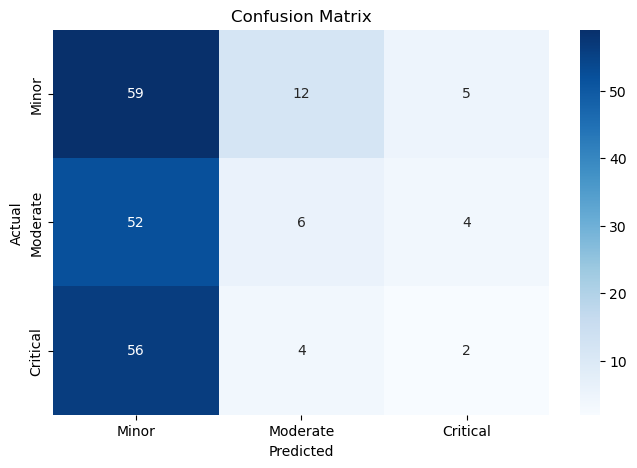

In [505]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
class_labels = ['Minor', 'Moderate', 'Critical']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()